In [1]:
#imports
import pandas as pd
import numpy as np
import glob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
#innitiate coded tsv files
# Define the list of desired numbers
use_all_numbers = True
desired_numbers = [11, 12, 16, 18]

# Get a list of all .tsv files in the data folder
tsv_files = glob.glob('data/*.tsv')
# Filter files based on the flag
if use_all_numbers:
    filtered_files = tsv_files
else:
    filtered_files = [file for file in tsv_files if any(f'play{num}coded.tsv' in file for num in desired_numbers)]


# Read each file into a DataFrame and store in a list
dataframes = [pd.read_csv(file, delimiter='\t') for file in filtered_files]

# Optionally, you can concatenate all DataFrames into a single DataFrame
all_data = pd.concat(dataframes, ignore_index=True)

In [3]:
import pandas as pd

# Define bin edges
bins = [-float('inf'), -60, -20, 20, 60, float('inf')]

# Define labels for each bin
labels = ['Very High Negative', 'High Negative', 'Neutral', 'High Positive', 'Very High Positive']

# Apply the categorization to the 'Score' column
all_data['Score_Category'] = pd.cut(all_data['Score'], bins=bins, labels=labels)

X = all_data.drop(columns=['Score', 'Score_Category', 'SequenceID', 'TimeStamp', 'First30SecondsCoinsCollected', 'First30SecondsAsteroidHits'])
y = all_data['Score_Category']

In [4]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical labels to numeric labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the logistic regression model
model = LogisticRegression(class_weight='balanced')  # Use 'balanced' to handle class imbalance
model.fit(X_train, y_train)




c:\Users\svanl\Documents\repositories\XAI Workbook\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [6]:
# Make predictions
y_pred = model.predict(X_test)

y_test_labels = label_encoder.inverse_transform(y_test)  # Convert y_test back to original labels
y_pred_labels = label_encoder.inverse_transform(y_pred)  # Convert y_pred back to original labels

import pandas as pd

# Create a DataFrame from X_test
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Add the actual and predicted labels to the DataFrame
X_test_df['Actual Label'] = y_test_labels  # Original class names (optional)
X_test_df['Predicted Label'] = y_pred_labels  # Original class names (optional)

# Print the DataFrame
print(X_test_df)


     RelativeTime  CollectableCoin1Distance  CollectableCoin2Distance  \
0       -1.657492                 -1.306375                 -0.860614   
1        0.295928                 -0.657919                 -0.860614   
2        0.028495                 -0.682860                 -0.860614   
3        0.383134                 -1.306375                 -0.860614   
4        1.266825                 -0.483335                 -0.860614   
..            ...                       ...                       ...   
229      0.679636                 -0.533216                 -0.350951   
230     -0.651713                  1.910964                 -0.860614   
231     -0.622645                  0.539230                  0.413544   
232      0.917999                 -0.632978                 -0.860614   
233     -0.919146                 -1.306375                 -0.287243   

     CollectableCoin3Distance  CollectableCoin4Distance  \
0                   -0.528592                 -0.242612   
1    

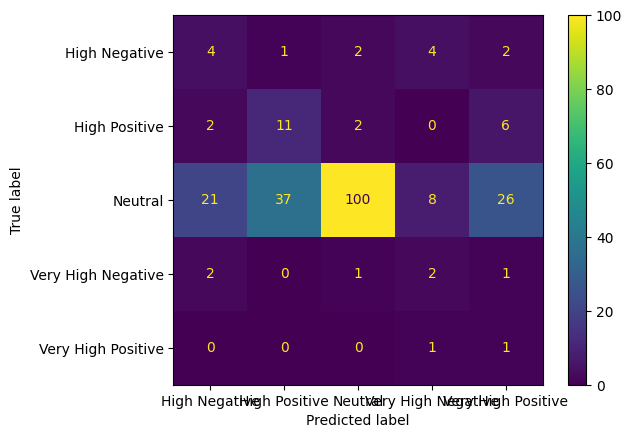

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot()

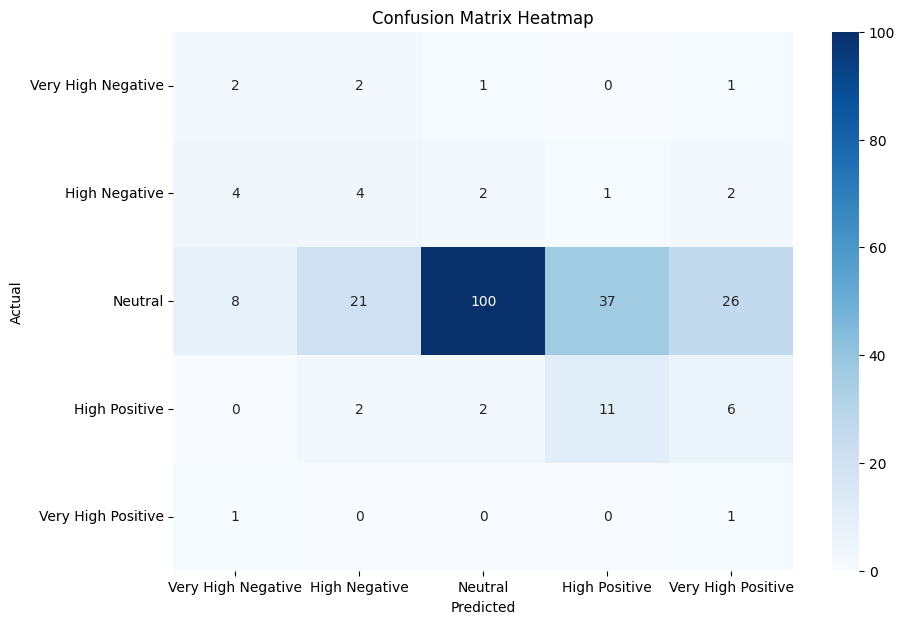

                    precision    recall  f1-score   support

Very High Negative       0.14      0.31      0.19        13
     High Negative       0.22      0.52      0.31        21
           Neutral       0.95      0.52      0.67       192
     High Positive       0.13      0.33      0.19         6
Very High Positive       0.03      0.50      0.05         2

          accuracy                           0.50       234
         macro avg       0.30      0.44      0.28       234
      weighted avg       0.81      0.50      0.60       234



In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test, y_pred, and label_encoder from previous context are defined

# Define custom order of labels
custom_labels = ['Very High Negative', 'High Negative', 'Neutral', 'High Positive', 'Very High Positive']

# Generate the confusion matrix with reordered labels
cm = confusion_matrix(y_test, y_pred, labels=[label_encoder.transform([label])[0] for label in custom_labels])

# Plot the confusion matrix as a heatmap with reordered labels
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=custom_labels, yticklabels=custom_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Generate and print classification report with custom label ordering
print(classification_report(y_test, y_pred, target_names=custom_labels))

cm = confusion_matrix(y_test, y_pred, labels=[label_encoder.transform([label])[0] for label in custom_labels])

